In [31]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [32]:
def calc_accuracy(df):
    return (df['true_label'] == df['predict_label']).sum() / len(df)

# Prediction Import

In [33]:
LABELS = ["Downstairs", "Jogging", "Sitting", "Standing", "Upstairs", "Walking"]
df = pd.read_csv('predict.csv', index_col=0)
predict = df.drop('true', axis=1)
true = df['true']
del df
true_encoded = true.map(lambda x: LABELS[x])
true_encoded.name = 'true_label'
predict.columns = LABELS
predict.head()

,Downstairs,Jogging,Sitting,Standing,Upstairs,Walking
0,2.552658e-21,2.122475e-16,3.884776e-20,7.190544e-24,7.007994e-06,9.999930e-01
1,8.075380e-18,1.874679e-22,1.000000e+00,5.128616e-12,1.582593e-15,8.110536e-20
2,1.449904e-09,1.032291e-12,2.296275e-14,1.441160e-15,9.890590e-01,1.094098e-02
3,1.962896e-08,9.999998e-01,1.166201e-22,4.719917e-24,2.200249e-07,7.606259e-17
4,3.940084e-20,1.853153e-18,6.323890e-09,9.999999e-01,1.125152e-07,8.105599e-17


In [34]:
# min-max normalization
# predict = predict.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)
# predict = predict.apply(lambda x: x / x.sum(), axis=1)

predict_label = predict.idxmax(axis=1)
predict_probability = predict.max(axis=1)
predict_probability.name = 'predict_probability'
predict_label.name = 'predict_label'
# predict.head()
# true.head()
# true_encoded.head()

In [35]:
df = pd.concat([
            predict,
            predict_probability,
            true,
            predict_label,
            true_encoded
        ], axis=1)
df.head(10)

,Downstairs,Jogging,Sitting,Standing,Upstairs,Walking,predict_probability,true,predict_label,true_label
0,2.552658e-21,2.122475e-16,3.884776e-20,7.190544e-24,7.007994e-06,9.999930e-01,0.999993,5,Walking,Walking
1,8.075380e-18,1.874679e-22,1.000000e+00,5.128616e-12,1.582593e-15,8.110536e-20,1.000000,2,Sitting,Sitting
2,1.449904e-09,1.032291e-12,2.296275e-14,1.441160e-15,9.890590e-01,1.094098e-02,0.989059,4,Upstairs,Upstairs
3,1.962896e-08,9.999998e-01,1.166201e-22,4.719917e-24,2.200249e-07,7.606259e-17,1.000000,1,Jogging,Jogging
4,3.940084e-20,1.853153e-18,6.323890e-09,9.999999e-01,1.125152e-07,8.105599e-17,1.000000,3,Standing,Standing
5,0.000000e+00,4.113750e-27,0.000000e+00,0.000000e+00,4.023009e-35,1.000000e+00,1.000000,5,Walking,Walking
6,9.999890e-01,5.431206e-17,1.217566e-24,1.642790e-22,1.093611e-05,1.913896e-09,0.999989,0,Downstairs,Downstairs
7,9.999955e-01,3.994999e-15,1.811027e-15,1.249596e-14,4.537962e-06,2.507819e-08,0.999995,0,Downstairs,Downstairs
8,3.828793e-20,1.000000e+00,2.048359e-34,3.806083e-32,3.591690e-13,1.287716e-28,1.000000,1,Jogging,Jogging
9,9.734398e-37,1.204215e-13,9.635543e-35,3.242813e-38,2.854655e-21,1.000000e+00,1.000000,5,Walking,Walking


Accuracy:  0.9521670511108413


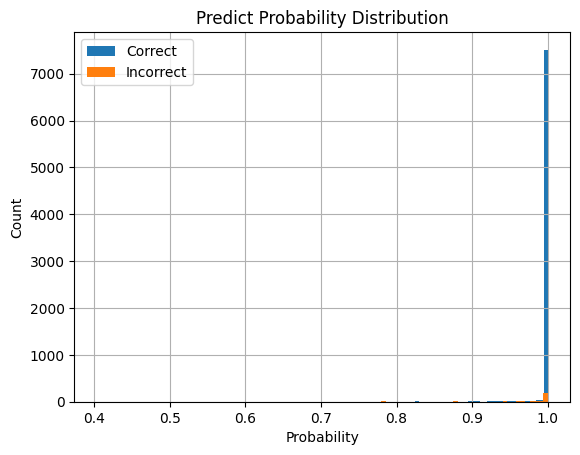

In [36]:
print('Accuracy: ', calc_accuracy(df))
# statival analysis
df.loc[df.true_label==df.predict_label, 'predict_probability'].hist(bins=100)
df.loc[df.true_label!=df.predict_label, 'predict_probability'].hist(bins=100)
plt.title('Predict Probability Distribution')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.legend(['Correct', 'Incorrect'])

In [44]:
thresholds = [0, 0.7, 0.9, 0.99, 0.999, 0.99999,]
results = []
for threshold in thresholds:
    df_confidence = df[df['predict_probability'] > threshold]
    df_drop = df.loc[list(set(df.index) - set(df_confidence.index)),:]
    results.append({
        'threshold': threshold,
        'confidence_accuracy': calc_accuracy(df_confidence),
        'confidence_raito': len(df_confidence) / len(df),
        'drop_accuracy': calc_accuracy(df_drop),
        'drop_ratio': len(df_drop) / len(df),
        })
    df_confidence = df[df['predict_probability'] > threshold]
    df_drop = df.loc[list(set(df.index) - set(df_confidence.index)),:]
    cm = confusion_matrix(df_confidence['true_label'], df_confidence['predict_label'])
    cm_df = pd.DataFrame(cm, index=LABELS, columns=LABELS)
    plt.figure(figsize=(10, 10))
    sns.heatmap(
        cm_df,
        annot=True,
        fmt="d",
        linewidths=0.5,
        cmap="Blues",
        cbar=False,
        annot_kws={"size": 14},
        square=True,
    )
    plt.title(f"Confusion Matrix (threshold={threshold})")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.savefig(f'confusion_matrix/threshold{threshold}.png')
    plt.close()
results = pd.DataFrame(results).fillna(0)
results = results.set_index('threshold')
results

/tmp/ipykernel_287740/3327794854.py:2: RuntimeWarning: invalid value encountered in long_scalars
  return (df['true_label'] == df['predict_label']).sum() / len(df)


,confidence_accuracy,confidence_raito,drop_accuracy,drop_ratio
threshold,,,,
0.00000,0.952167,1.000000,0.000000,0.000000
0.70000,0.957627,0.988467,0.484211,0.011533
0.90000,0.964996,0.971106,0.521008,0.028894
0.99000,0.974468,0.941484,0.593361,0.058516
0.99900,0.980921,0.909919,0.661725,0.090081
0.99999,0.988466,0.842054,0.758647,0.157946
